In [1]:
import pandas as pd
import numpy as np

In [2]:
ev_DATA = pd.read_csv(r"C:\Users\DELL\Desktop\data folder\EV Sales\Electric_Vehicle_Population_Data.csv")
print(ev_DATA.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
# find_null_value
ev_DATA.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
ev_DATA["Legislative District"]

0         37.0
1          1.0
2         36.0
3          5.0
4         23.0
          ... 
177861    31.0
177862    35.0
177863    13.0
177864     5.0
177865    27.0
Name: Legislative District, Length: 177866, dtype: float64

In [6]:
ev_DATA = ev_DATA.dropna()

# For the task of market size of electric vehicles analysis, we can explore the following areas:
EV Adoption Over Time: Analyze the growth of the EV population by model year.
Geographical Distribution: Understand where EVs are most commonly registered (e.g., by county or city).
EV Types: Breakdown of the dataset by electric vehicle type (BEV, etc.).
Make and Model Popularity: Identify the most popular makes and models among the registered EVs.
Electric Range Analysis: Analyze the electric range of vehicles to see how EV technology is progressing.
Estimated Growth in Market Size: Analyze and find the estimated growth in the market size of electric vehicles.

In [7]:
ev_DATA.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


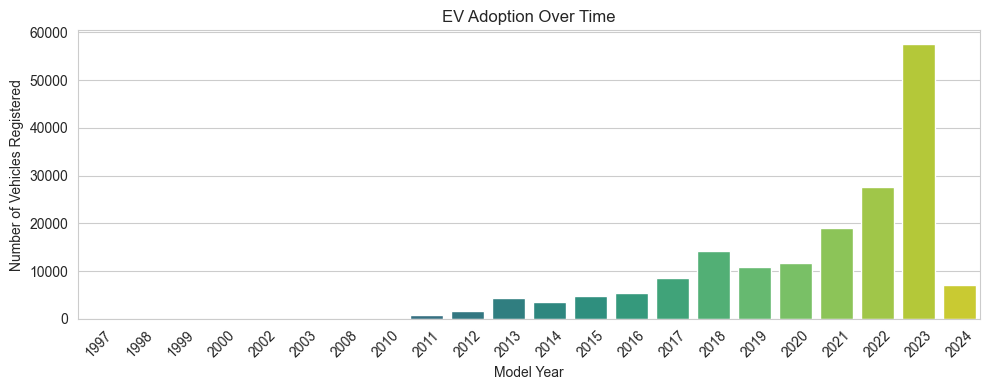

In [8]:
# EV Adoption Over Time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
ev_adoption_by_year = ev_DATA["Model Year"].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette="viridis")
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Now, let’s start by selecting the top 3 counties based on EV registrations and 
then analyze the distribution of EVs within the cities of those counties:

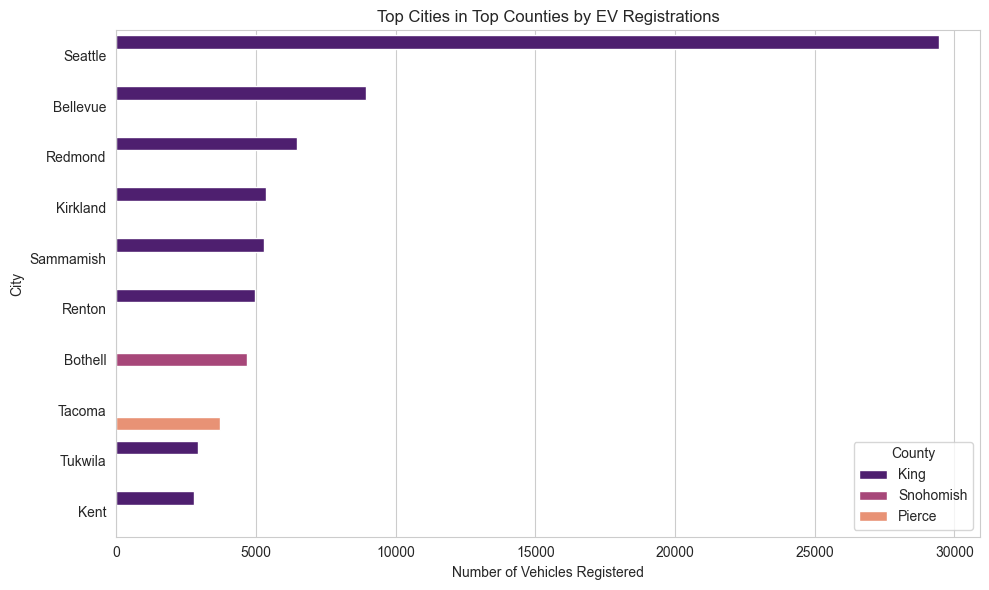

In [9]:
# geographical distribution at county level
ev_county_distribution = ev_DATA['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_DATA[ev_DATA['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

In [10]:
# electric vehicle Types
ev_type_distribution = ev_DATA["Electric Vehicle Type"].value_counts()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


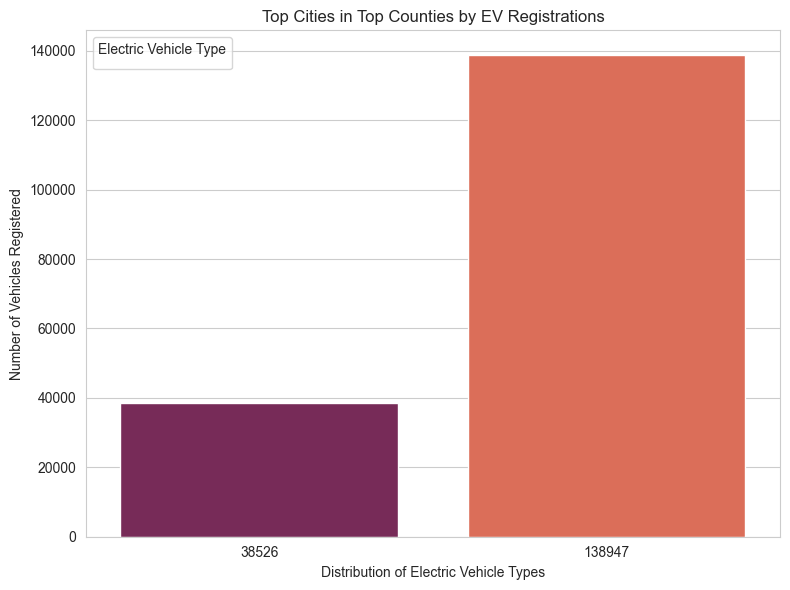

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,data=ev_DATA["Electric Vehicle Type"].value_counts(), palette="rocket")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Distribution of Electric Vehicle Types')
plt.ylabel('Number of Vehicles Registered')
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [12]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_DATA["Make"].value_counts().head(10)
ev_make_distribution

TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: Make, dtype: int64

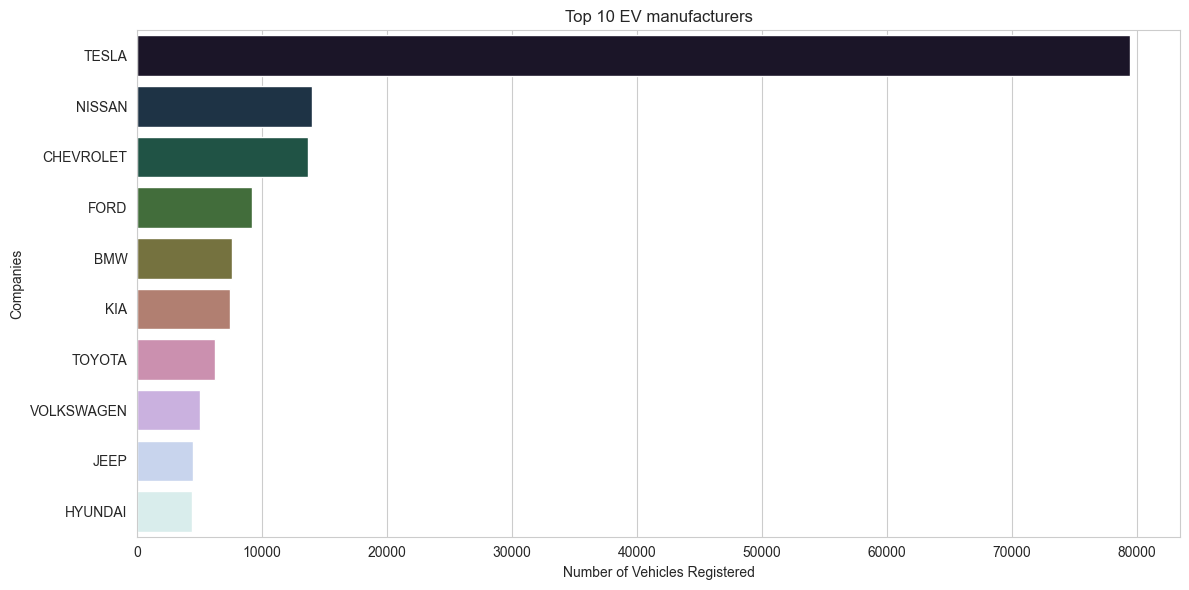

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title("Top 10 EV manufacturers")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Companies")
plt.tight_layout()
plt.show()

In [14]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index
top_makes_data = ev_DATA[ev_DATA["Make"].isin(top_3_makes)]
# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

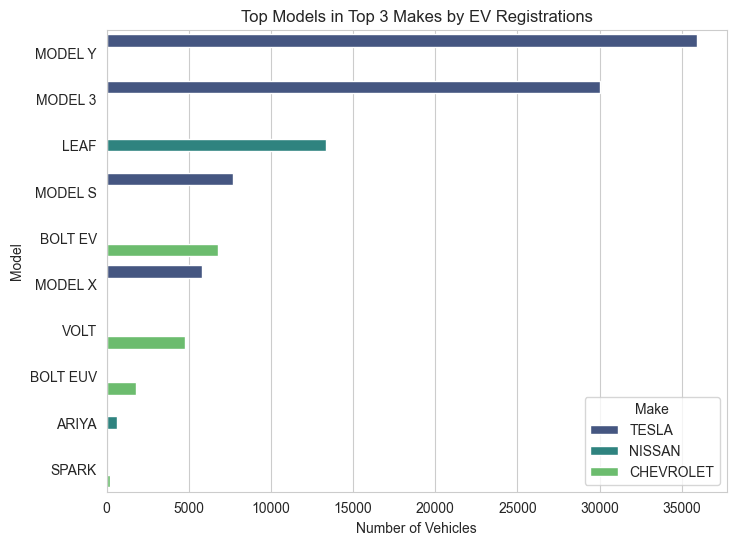

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data = top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.legend(title='Make')
plt.show()

In [16]:
ev_DATA.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


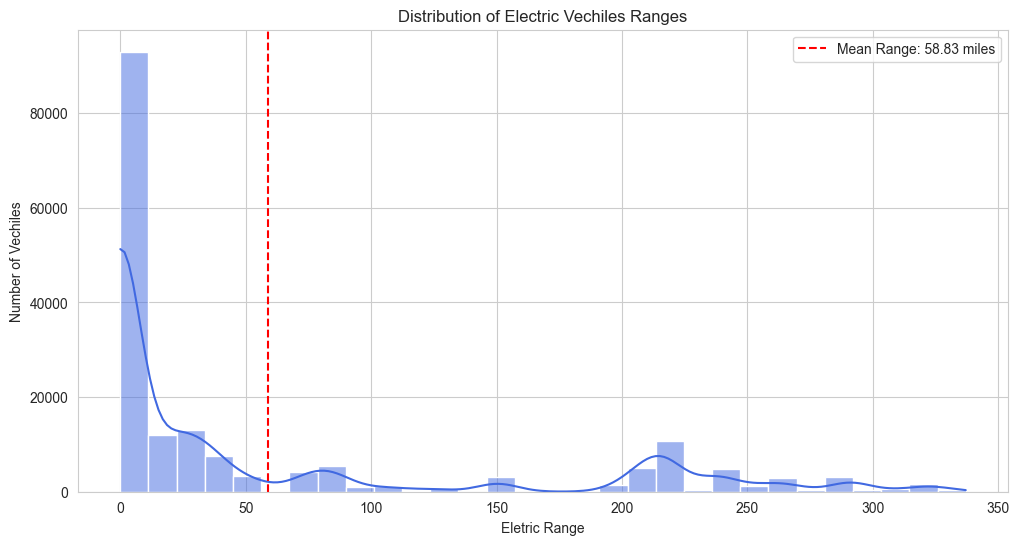

In [17]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_DATA["Electric Range"], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Electric Vechiles Ranges")
plt.xlabel("Eletric Range")
plt.ylabel("Number of Vechiles")
plt.axvline(ev_DATA['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_DATA["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

In [18]:
# estimate market Size USA
ev_registration_counts = ev_DATA['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64